### Libraries

In [15]:
# Number Libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

### Reading the Data

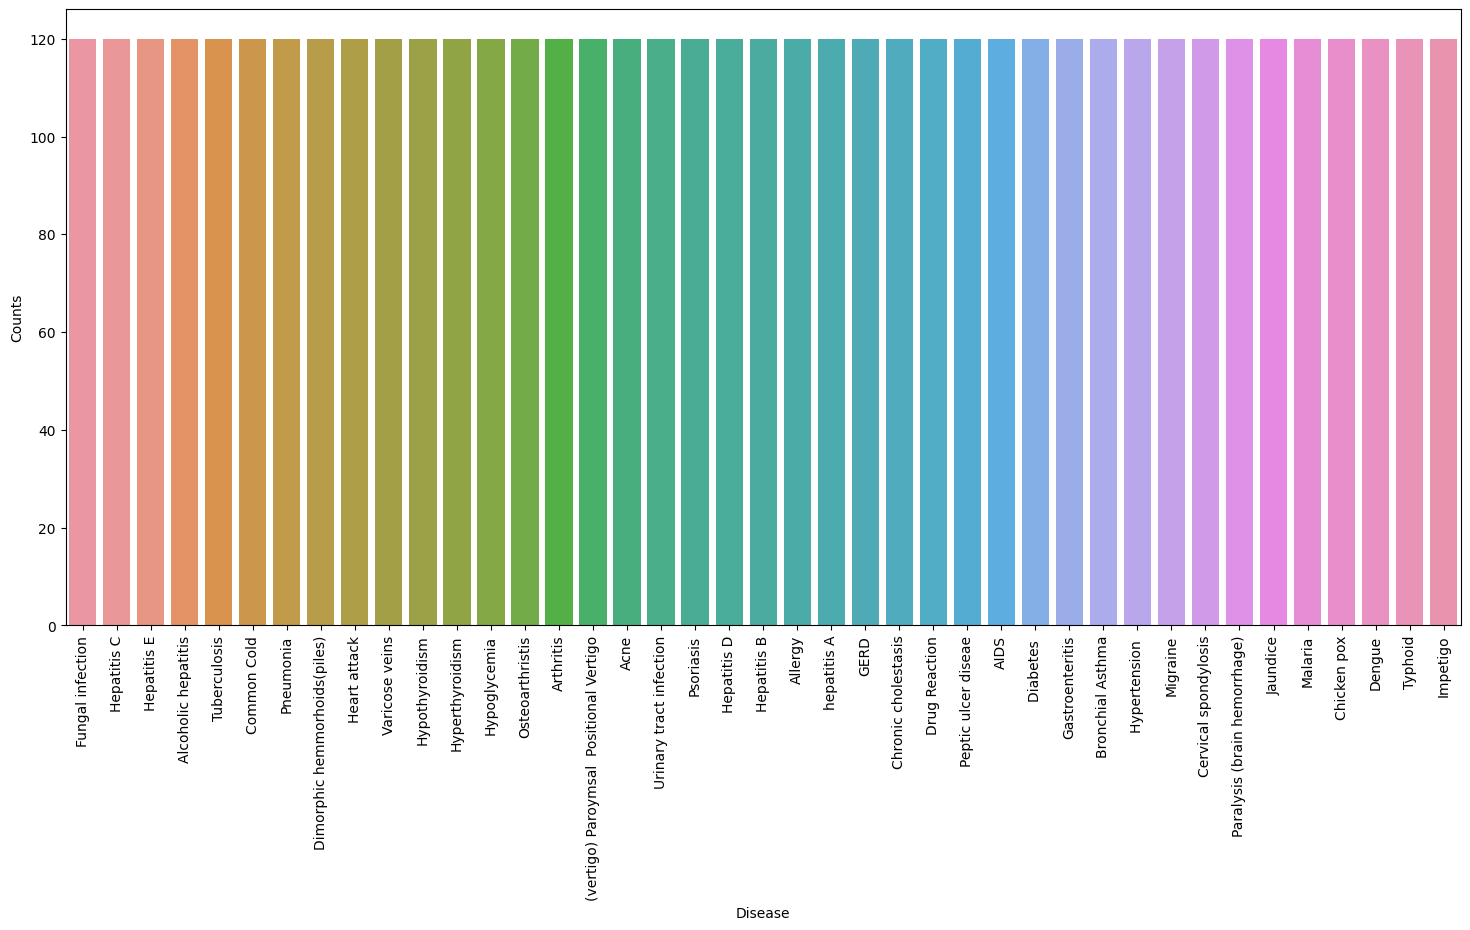

In [16]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


#### See the above graph and how it is balanced? Since there are 120 values of each type, that means that the dataset is balanced and that there will be no trouble due to an insufficient amount of data for any one diagnosis

In [17]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


#### Prognosis data isn't an easy 1 or 0 like the symptoms, so we have to convert them using the LabelEncoder above.

In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.1, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (4428, 132), (4428,)
Test: (492, 132), (492,)


#### We split the data here. 90% goes to training, 10% goes to testing.

 I DONT KNOW WHAT ANY OF THESE TERMS MEAN, but I looked them up and here is a paraphrased summary

1. K-Fold Cross-validation: Dataset is put into a number (k) of subsets, which are now called folds. Model is trained on k-1 subsets and the remaining subset is used to evaluate model performance (if you still don't understand the last part its OK because I didn't get it when I was writing either)

2. Support Vector Classifier: When you give it labeled training data, the alg tries to find an optimal "hyperplane" (plane with 1 less dimension) that puts the samples into different categories in "hyperspace" (some sort of database that is apparently a combination of "Elasticsearch" and "vector databases" (idk))

3. Gaussian Naive Bayes Classifier: Alg that uses Bayes Theoreom (idk lol) to classify data points

4. Random Forest Classifier: An ensemble learning (uses many algs i think) that uses many many many decision trees to classify, it uses the mode of a bunch of other predictions to make a final prediction

 methinks I will do all of these and whichever is the most goodestest I will use in the final product !!!

# K-Fold Cross-Validation for model selections

In [19]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


# But we want really high accuracy... so lets COMBINE THE THREE AND TAKE THE MOST POPULAR OPINION!!!!!!!!!!

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


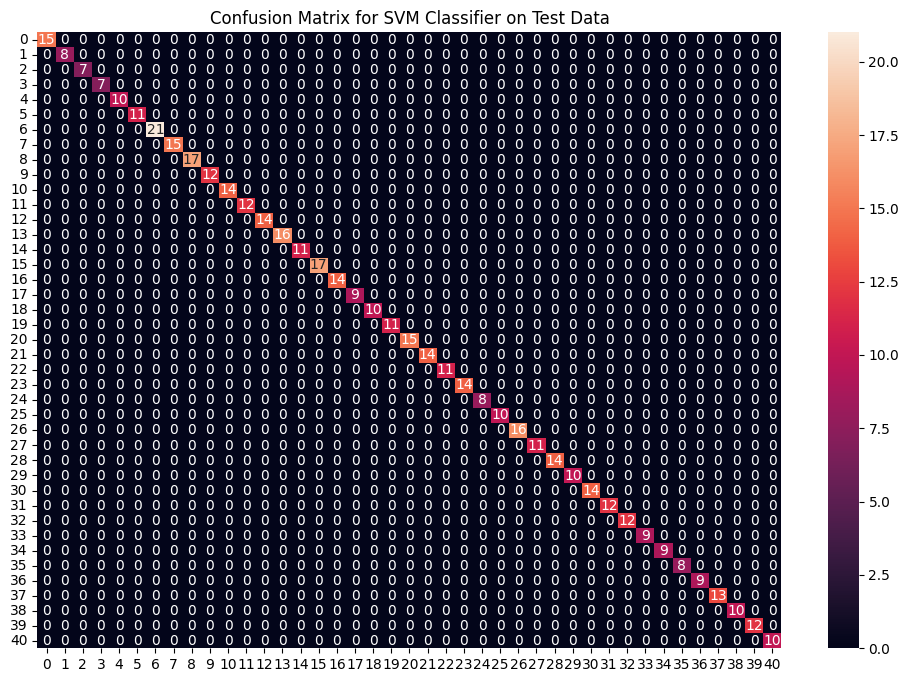

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


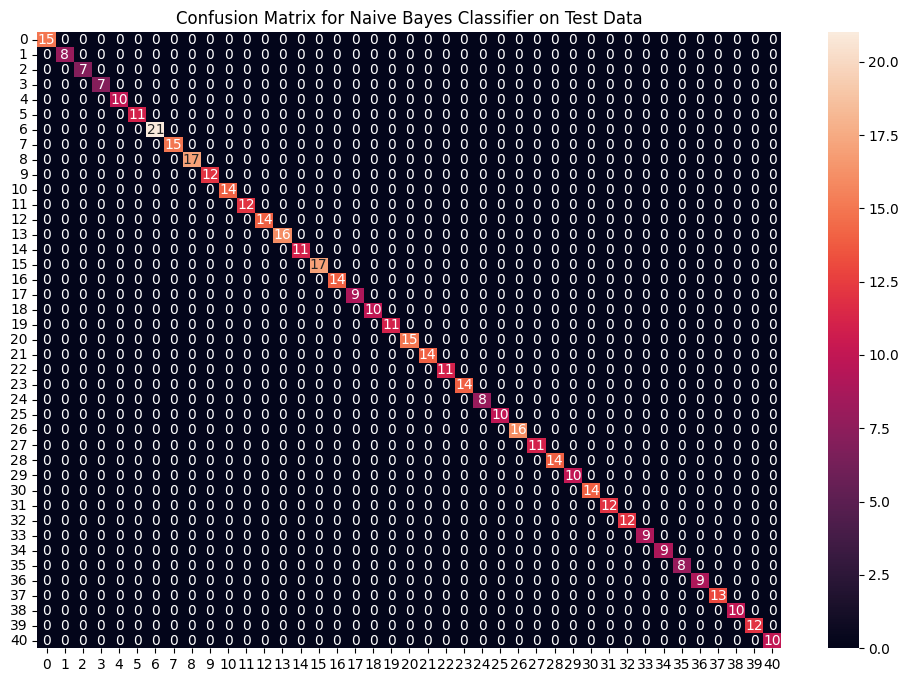

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


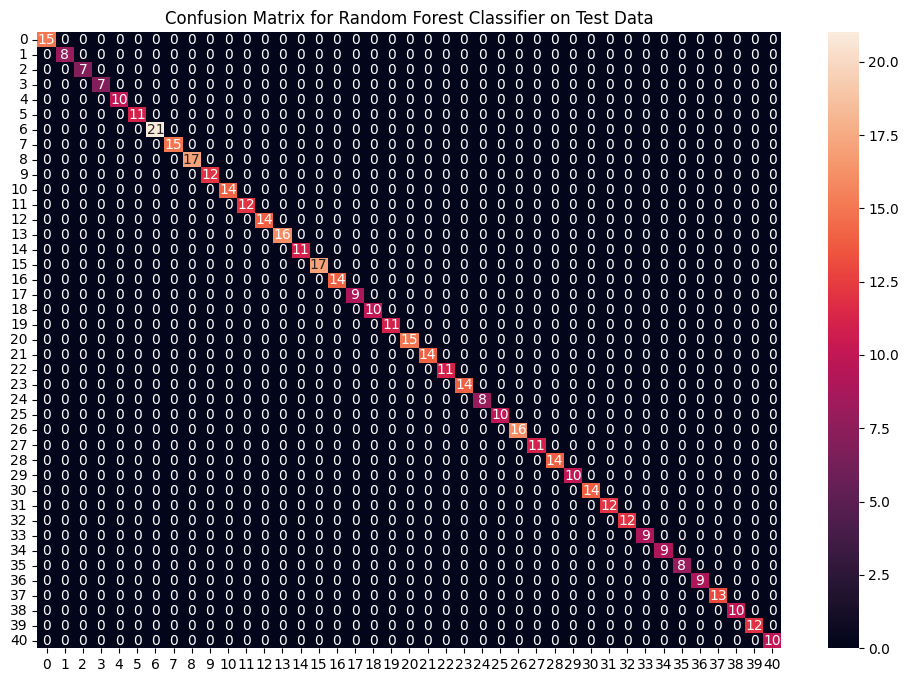

In [20]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


those mystery things above are called confusion matrices (good name) , basically the models perform 100% accurately on training data (to be expected)

BUT NOW WE NEED TO TEST THEM ON.... UNSEEN DATA!!

Accuracy on Test dataset by the combined model: 100.0


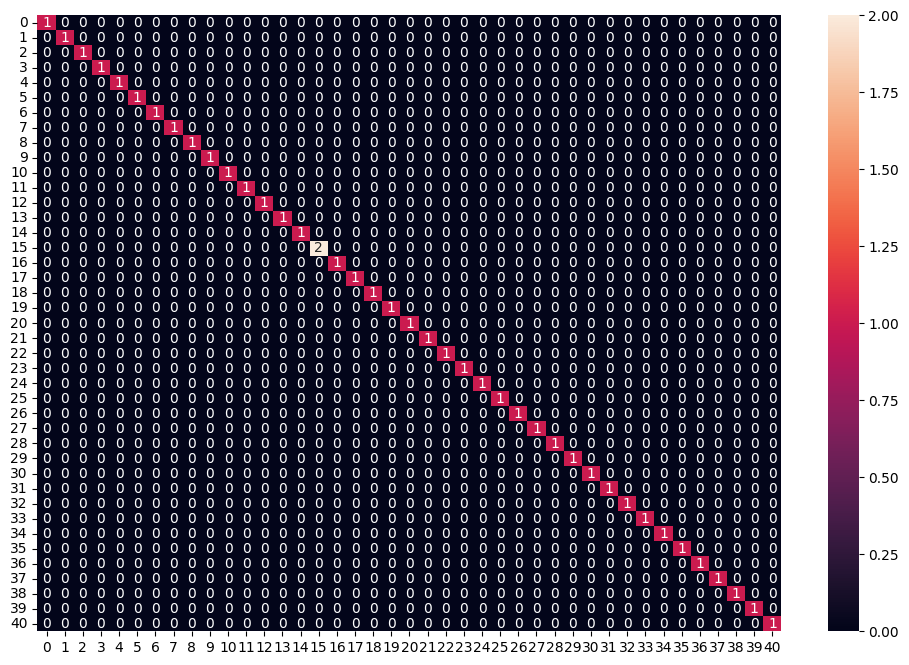

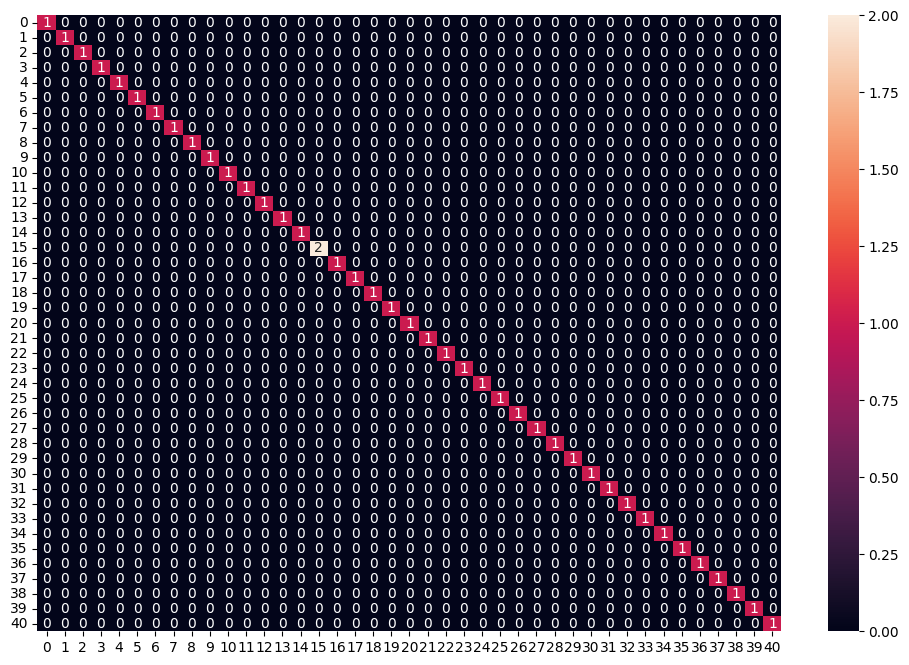

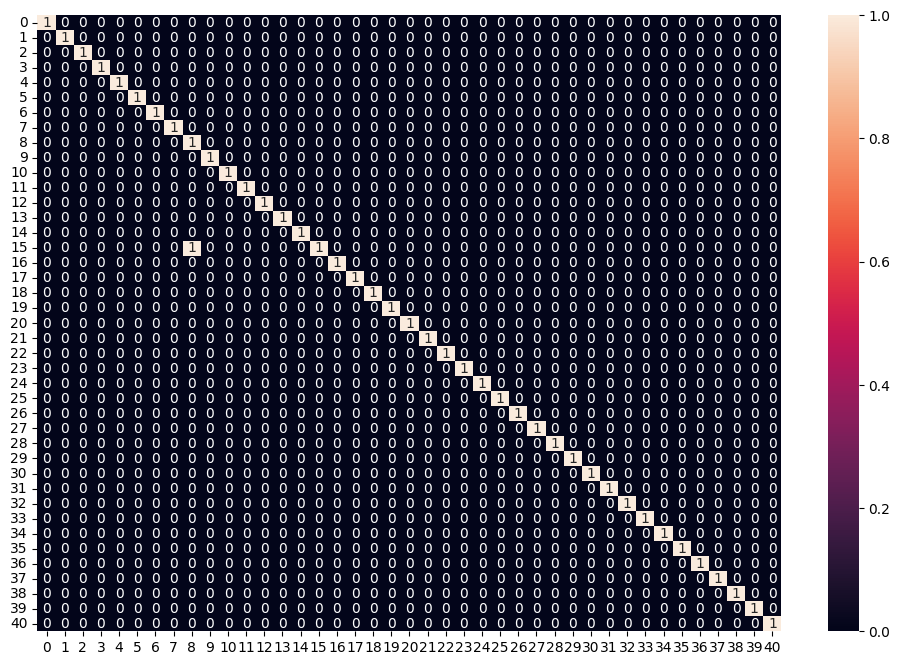

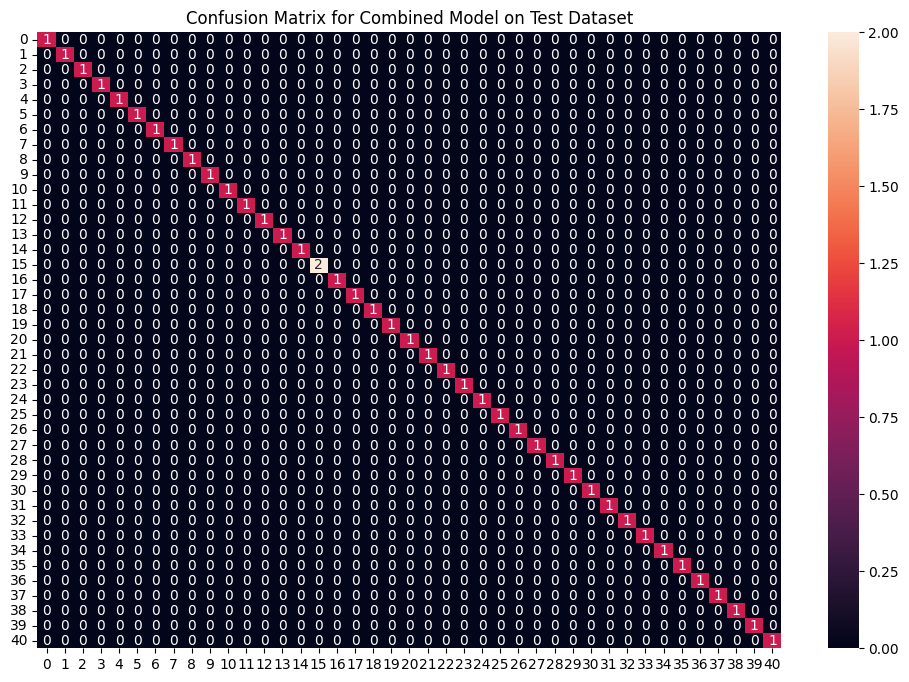

In [21]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

test_matrix1 = confusion_matrix(test_Y, svm_preds)
plt.figure(figsize=(12,8))
sns.heatmap(test_matrix1, annot = True)

test_matrix2 = confusion_matrix(test_Y, nb_preds)
plt.figure(figsize=(12,8))
sns.heatmap(test_matrix2, annot = True)

test_matrix3 = confusion_matrix(test_Y, rf_preds)
plt.figure(figsize=(12,8))
sns.heatmap(test_matrix3, annot = True)

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


interestingly... it still works on test data, because it takes the guess from a bunch of models and takes the mode!! altho u can see that most of hte models can accurately predict anyways

In [22]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
from collections import Counter

def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	
	numeric_predictions = [rf_prediction, nb_prediction, svm_prediction]
	counter = Counter(numeric_predictions)
	final_prediction = counter.most_common(1)[0][0]
 
 
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Here is a function that works nicely! very cool and good! this is basically my whole project 😭, but i would need to add support for more diseases

In [23]:
symptoms

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [24]:
print(predictDisease("Cough"))
test_go_in = [0] * len(data_dict["symptom_index"])

test_go_in = np.array(test_go_in).reshape(1,-1)

print(test_go_in)
print(final_rf_model.predict(test_go_in)[0])
print(data_dict["predictions_classes"][final_rf_model.predict(test_go_in)[0]])
data_dict["predictions_classes"][5]

{'rf_model_prediction': 'GERD', 'naive_bayes_prediction': 'GERD', 'svm_model_prediction': 'AIDS', 'final_prediction': 'GERD'}
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
5
Arthritis


d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Arthritis'

In [25]:
originalData = pd.read_csv(DATA_PATH).dropna(axis = 1)
possible_prognosises = np.unique(originalData["prognosis"])

prog_num = 1
for symptom in symptoms:
    print(f"\"{symptom}\",", end='')
    prog_num += 1

symptomsNormal = symptoms.tolist()
print()
print(symptomsNormal.index("vomiting"))

"itching","skin_rash","nodal_skin_eruptions","continuous_sneezing","shivering","chills","joint_pain","stomach_pain","acidity","ulcers_on_tongue","muscle_wasting","vomiting","burning_micturition","spotting_ urination","fatigue","weight_gain","anxiety","cold_hands_and_feets","mood_swings","weight_loss","restlessness","lethargy","patches_in_throat","irregular_sugar_level","cough","high_fever","sunken_eyes","breathlessness","sweating","dehydration","indigestion","headache","yellowish_skin","dark_urine","nausea","loss_of_appetite","pain_behind_the_eyes","back_pain","constipation","abdominal_pain","diarrhoea","mild_fever","yellow_urine","yellowing_of_eyes","acute_liver_failure","fluid_overload","swelling_of_stomach","swelled_lymph_nodes","malaise","blurred_and_distorted_vision","phlegm","throat_irritation","redness_of_eyes","sinus_pressure","runny_nose","congestion","chest_pain","weakness_in_limbs","fast_heart_rate","pain_during_bowel_movements","pain_in_anal_region","bloody_stool","irritati

In [26]:
import joblib

joblib.dump(final_rf_model, 'rf_model.joblib')
joblib.dump(final_nb_model, 'nb_model.joblib')
joblib.dump(final_svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [27]:
import onnxmltools
import numpy as np
from skl2onnx.common.data_types import FloatTensorType

sk_rf_model = joblib.load('rf_model.joblib')
sk_nb_model = joblib.load('nb_model.joblib')
sk_svm_model = joblib.load('svm_model.joblib')

initial_type = [('float_input', FloatTensorType([None, 132]))]

rf_onnx_model = onnxmltools.convert.convert_sklearn(sk_rf_model, initial_types=initial_type)
nb_onnx_model = onnxmltools.convert.convert_sklearn(sk_nb_model, initial_types=initial_type)
svm_onnx_model = onnxmltools.convert.convert_sklearn(sk_svm_model, initial_types=initial_type)

onnxmltools.utils.save_model(rf_onnx_model, 'rf_model.onnx')
onnxmltools.utils.save_model(rf_onnx_model, 'nb_model.onnx')
onnxmltools.utils.save_model(rf_onnx_model, 'svm_model.onnx')


In [28]:
import onnxruntime
import numpy as np

# Load the ONNX model
onnx_model = 'rf_model.onnx'
sess = onnxruntime.InferenceSession(onnx_model)

# Generate a sample input data for inference
sample_input = np.zeros((1, 132), dtype=np.float32)  # Use the appropriate shape and data type

# Run the model with the sample input
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name
result = sess.run([output_name], {input_name: sample_input})

# Process the result
predictions = result[0]
# Perform any necessary post-processing or analysis on the predictions

# Print the predictions
print(predictions)

print(final_rf_model.predict(sample_input)[0])


[5]
5


d:\Desktop\COS 120 model\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
testJaundice = [1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
jaundiceSymptoms = []
for i, num in enumerate(testJaundice):
    if(num == 1):
        jaundiceSymptoms.append(symptoms[i])
        
print(jaundiceSymptoms)

print(symptoms)
print(len(symptoms))
print(possible_prognosises)
print(len(possible_prognosises))

['itching', 'vomiting', 'fatigue', 'weight_loss', 'high_fever', 'yellowish_skin', 'dark_urine', 'abdominal_pain']
['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_ urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion'